# Simulación de Variables Aleatorias con Soporte Numerable
En este notebook se presenta el método de la función inversa para simular las v.a. Poisson y Geométrica.

### Método de la función inversa
Dada $F$ la función de distribución de una variable aleatoria $X$, diremos que su **inversa generalizada** es la función

$$F^{-1}(y) = \inf \{ x : F(x) \geq y\}$$

En caso de que $F$ sea biyectiva, entonces ésta coincide con la inversa usual.

 El Método de la función inversa asegura que si $U \sim U(0,1)$, entonces $F^{-1}(U) \sim X$. Para ver la demostración de este método se puede consultar el libro [A first course in Probability](https://www.pearson.com/en-us/subject-catalog/p/first-course-in-probability-a/P200000006334/9780137504589) de Sheldon Ross en la sección 10.2.1.

Como en el caso de v.a. discretas con soporte numerable tenemos que

$$F(x) = \sum_{i = 1}^{x} p(i)$$

entonces para simularla se usa un bucle del tipo $\texttt{while}$.

**Pseudo-Código para simular una v.a. discreta con soporte numerable**

Dada $X$ una v.a. con soporte $\mathbb{N}$, nos interesa simular un valor para $X$.

1. Definimos una función que reciba los parámetros de $X$ y $n \in \mathbb{N}$ y devuelva la probabilidad de que $X=n$.
2. Inicializamos variables $F = 0$, una lista vacía $Z$ y $U \sim U(0,1)$.
3. Usamos un $\texttt{while}$ cuya condición de seguir sea $F < U$ y dentro hará lo siguiente:
* Agrega el siguiente valor del soporte a la lista $Z$.
* Agrega a F la función definida en $1$ evaluada en el último valor de la lista $Z$.
4. Cuando ocurra que $F \geq U$, entonces el método se detiene y devolvemos el último valor de $Z$.

Ahora veamos el ejemplo con la v.a. Poisson

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
# Función de masa de una Poisson
def masa_poisson(lam, j):
  return (math.exp(-lam) * lam**j) / math.factorial(j)

# Variables iniciales
F = 0
lam = 2
u = random.random()
Z = []
# Condición del método
while F < u:
  Z.append(len(Z))
  F += masa_poisson(lam,Z[-1])
# El valor será el último de la lista Z
print(Z[-1])

3


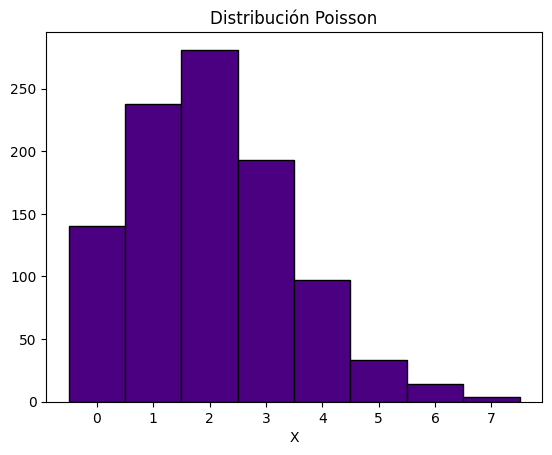

In [3]:
def simular_poisson(lam):
  F = 0
  u = random.random()
  Z = []
  # Verificamos la condición con el bucle while
  while F < u:
    Z.append(len(Z))
    F += masa_poisson(lam,Z[-1])
  return Z[-1]

# Visualizamos el histograma
xpoints = [simular_poisson(2) for i in range(1000)]
plt.hist(xpoints, bins = range(max(xpoints)+2), edgecolor = 'black', color = 'indigo', align='left')
plt.title('Distribución Poisson')
plt.xlabel('X')
plt.show()

Ahora haremos una clase para poder usar la distribución Poisson

In [4]:
class Poisson:
  def __init__(self, lam):
    '''
    lam: parámetro de la distribución Poisson
    '''
    self.lam = lam
  def masa(self, j):
    return masa_poisson(self.lam, j) # Función de masa
  def graficar(self, N=1000):
    xpoints = [simular_poisson(self.lam) for i in range(N)] # Lista de valores de X
    plt.figure()
    plt.hist(xpoints, bins = range(max(xpoints)+2), edgecolor = 'black', color = 'indigo', align='left') # Histograma
    plt.title(f'Distribución Poisson de parámetro {self.lam}')
    plt.xlabel('X')

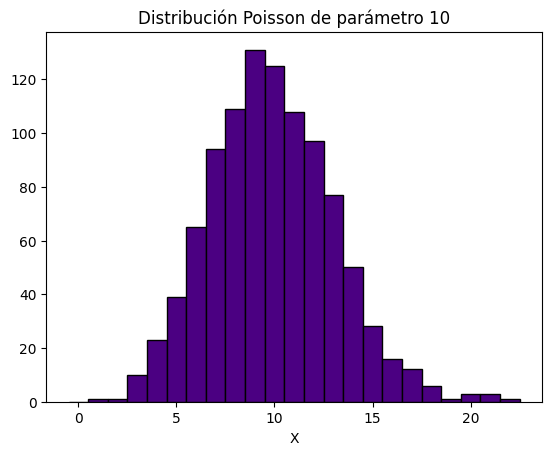

In [5]:
poi1 = Poisson(10)
poi1.graficar()

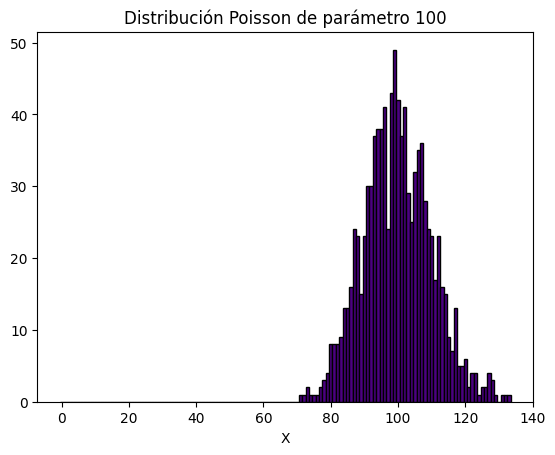

In [6]:
po2 = Poisson(100)
po2.graficar()

Veamos ahora el mismo ejemplo con una variable aleatoria geométrica

In [7]:
def masa_geometrica(p, j):
  return p * (1-p)**j

# Variables iniciales
F = 0
p = 0.5
u = random.random()
Z = []
# Condición del método
while F < u:
  Z.append(len(Z))
  F += masa_geometrica(p, Z[-1])
# El valor será el último de la lista Z
print(Z[-1])

5


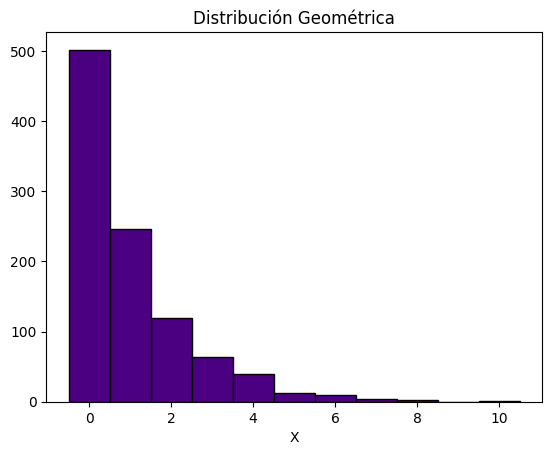

In [8]:
def simular_geometrica(p):
  F = 0
  u = random.random()
  Z = []
  # Condición del método
  while F < u:
    Z.append(len(Z))
    F += masa_geometrica(p, Z[-1])
  return Z[-1]

# Visualizamos el histograma
plt.figure()
xpoints = [simular_geometrica(p) for i in range(1000)]
plt.hist(xpoints, bins = range(max(xpoints)+2), edgecolor = 'black', color = 'indigo', align='left')
plt.title('Distribución Geométrica')
plt.xlabel('X')
plt.show()

Finalmente definimos una clase para poder trabajar con geométricas

In [9]:
class geometrica:
  def __init__(self, p):
    '''
    p: probabilidad de éxito
    '''
    self.p = p
  def masa(self, j):
    return masa_geometrica(self.p, j) # Función de masa
  def graficar(self, N=1000):
    xpoints = [simular_geometrica(self.p) for i in range(N)] # Lista de valores de X
    plt.figure()
    plt.hist(xpoints, bins = range(max(xpoints)+2), edgecolor = 'black', color = 'indigo', align='left') # Histograma
    plt.title(f'Distribución Geométrica {self.p}')
    plt.xlabel('X')
    plt.show()

Ahora veamos algunos ejemplos


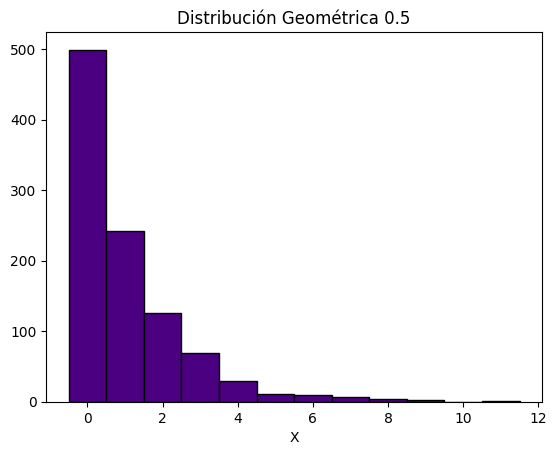

In [10]:
geo1 = geometrica(0.5)
geo1.graficar()

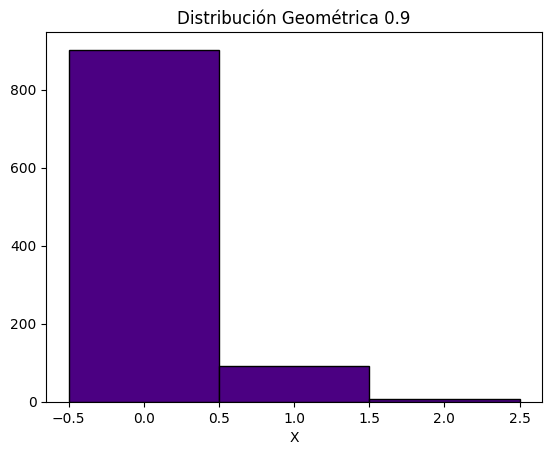

In [11]:
geo3 = geometrica(0.9)
geo3.graficar()

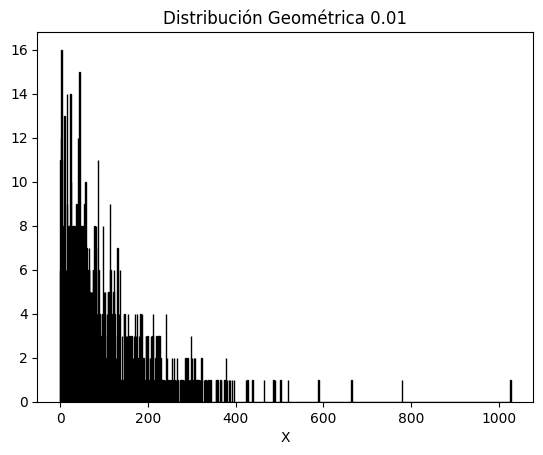

In [12]:
geo4 = geometrica(0.01)
geo4.graficar()

Ahora veamos el ejemplo con la v.a. Binomial, con esto también verificamos que este método funciona también para variables aleatorias con soporte finito.

In [13]:
# Función de masa de una Binomial
def masa_binomial(n, p, j):
  return math.comb(n,j) * p**j * (1-p)**(n-j)

# Variables iniciales
F = 0
n = 10
p = 0.5
u = random.random()
Z = []
# Condición del método
while F < u:
  Z.append(len(Z))
  F += masa_binomial(n, p,Z[-1])
# El valor será el último de la lista Z
print(Z[-1])

4


Ahora hacemos una simulación y graficamos el histograma

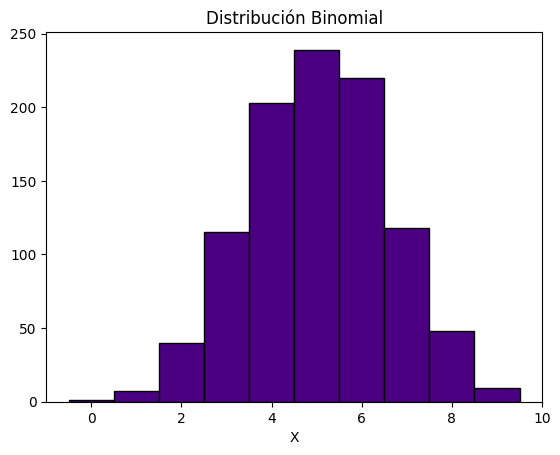

In [14]:
def simular_binomial(n, p):
  F = 0
  u = random.random()
  Z = []
  # Condición del método
  while F < u:
    Z.append(len(Z))
    F += masa_binomial(n, p, Z[-1])
  return Z[-1]

# Visualizamos el histograma
xpoints = [simular_binomial(n, p) for i in range(1000)]
plt.hist(xpoints, bins = range(max(xpoints)+2), edgecolor = 'black', color = 'indigo', align='left')
plt.title('Distribución Binomial')
plt.xlabel('X')
plt.show()

Finalmente definimos una clase para poder trabajar con binomiales

In [15]:
class Binomial:
  def __init__(self, n, p):
    '''
    n: número de ensayos
    p: probabilidad de éxito
    '''
    self.n = n
    self.p = p
  def masa(self, j):
    return masa_binomial(self.n, self.p, j) # Función de masa
  def graficar(self, N=1000):
    xpoints = [simular_binomial(self.n, self.p) for i in range(N)] # Lista de valores de X
    plt.figure()
    plt.hist(xpoints, bins = range(max(xpoints)+2), edgecolor = 'black', color = 'indigo', align='left') # Histograma
    plt.title(f'Distribución Binomial {self.n, self.p}')
    plt.xlabel('X')

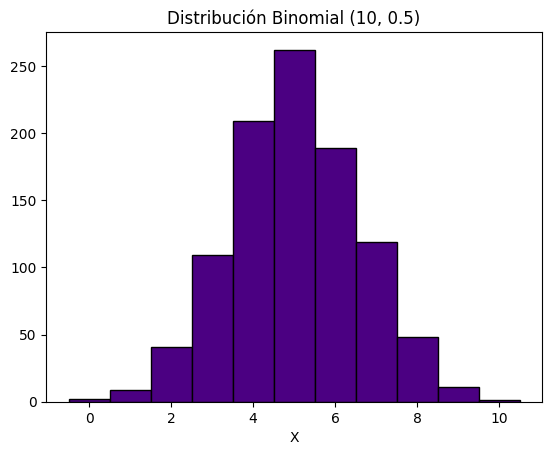

In [16]:
binom1 = Binomial(10, 0.5)
binom1.graficar()

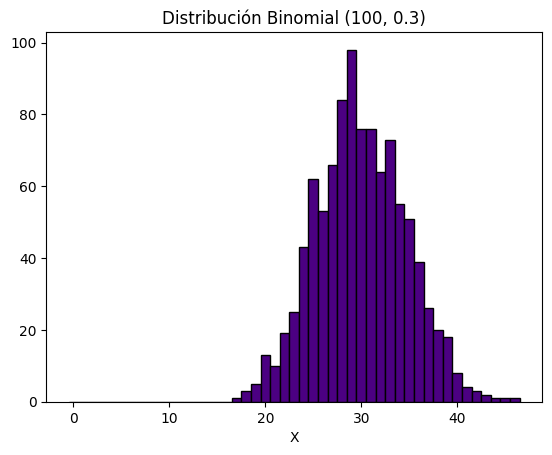

In [17]:
binom2 = Binomial(100, 0.3)
binom2.graficar()

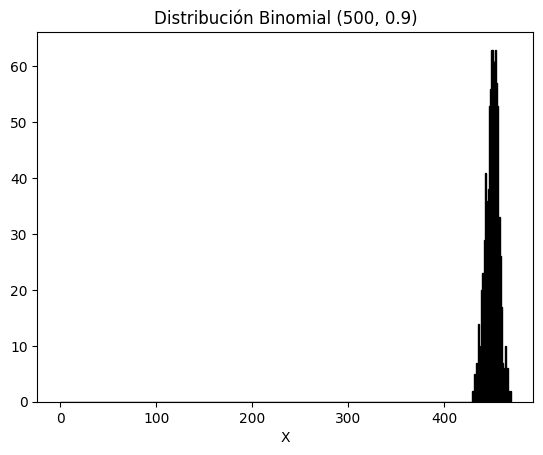

In [18]:
binom3 = Binomial(500, 0.9)
binom3.graficar()